# Imports

In [3]:
# Foundation
import numpy as np
import pandas as pd
from pydataset import data

# Vizualize
import matplotlib.pyplot as plt
import seaborn as sns

# Math
from math import sqrt
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Custom
import wrangle as wrg
import explore as exp


# Exercise 1 & 2

- Load the tips dataset from either pydataset or seaborn.

- Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill. 

In [5]:
# load tips dataset

df = data('tips')
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3


In [7]:
# Fit a linear regression model

# Build it
lm = LinearRegression(normalize=True)

# Fit it
lm.fit(df[['total_bill']], df['tip'])

# Predict
df['yhat'] = lm.predict(df[['total_bill']])

In [8]:
# Create a baseline
df[['baseline']] = df[['tip']].mean()

In [9]:
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,yhat,baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279


# Exercise 3

- Plot the residuals for the linear regression model that you made.


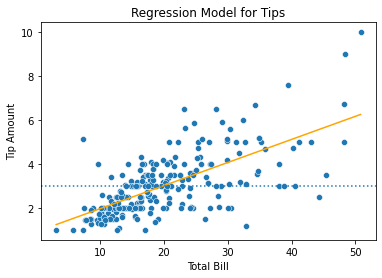

In [28]:
# Lets visualize the data

sns.scatterplot(x='total_bill', y='tip', data=df)
sns.lineplot(x='total_bill', y='yhat', data=df, color='orange')
plt.axhline(y=3, ls=':')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')
plt.title('Regression Model for Tips')

plt.show()

In [30]:
# Add residuals to our data for evaluation

df['residual'] = df['tip'] - df['yhat']

# Compare to baseline
df['baseline_residual'] = df['tip'] - df['baseline']

In [31]:
# Verify results
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,yhat,baseline,residual,baseline_residual
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,-1.694636,-1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,-0.346223,-1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279,0.373165,0.501721


In [34]:
# Compare Residuals to each other
df['residual'].sum(), df['baseline_residual'].sum()

(9.769962616701378e-14, -2.4868995751603507e-14)

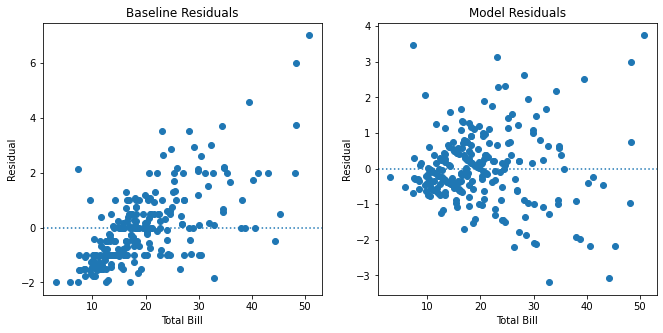

In [36]:
# Plot the residuals
plt.figure(figsize = (11,5))

# Baseline first
plt.subplot(121)
plt.scatter(df['total_bill'], df['baseline_residual'])
plt.axhline(y = 0, ls = ':')
plt.xlabel('Total Bill')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

# Our Regression Model
plt.subplot(122)
plt.scatter(df['total_bill'], df['residual'])
plt.axhline(y = 0, ls = ':')
plt.xlabel('Total Bill')
plt.ylabel('Residual')
plt.title('Model Residuals')
               
plt.show()


# Exercise 4 & 5

- Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

- Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [37]:
# Sqaure our residuals

# Model
df['residual^2'] = df.residual**2

# Baseline
df['baseline_residual^2'] = df.baseline_residual**2

In [38]:
# Verify
df.head(2)

,total_bill,tip,sex,smoker,day,time,size,yhat,baseline,residual,baseline_residual,residual^2,baseline_residual^2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,-1.694636,-1.988279,2.871792,3.953252
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,-0.346223,-1.338279,0.119870,1.790990


In [41]:
# Square of Sum Errors (SSE)

# Model
SSE = df['residual^2'].sum()

# Baseline
Baseline_SSE = df['baseline_residual^2'].sum()

print(f'Model SSE --> {SSE:.1f}')
print(f'Baseline SSE --> {Baseline_SSE:.1f}')

Model SSE --> 252.8
Baseline SSE --> 465.2


In [42]:
# Mean Square Errors (MSE)

# Model
MSE = SSE/len(df)

# Baseline
Baseline_MSE = Baseline_SSE/len(df)

print(f'Model MSE --> {MSE:.1f}')
print(f'Baseline MSE --> {Baseline_MSE:.1f}')

Model MSE --> 1.0
Baseline MSE --> 1.9


In [43]:
# Root Mean Squared Error (RMSE)

# Model
RMSE = sqrt(MSE)

# Baseline
Baseline_RMSE = sqrt(Baseline_MSE)

print(f'Model RMSE --> {RMSE:.1f}')
print(f'Baseline RMSE --> {Baseline_RMSE:.1f}')

Model RMSE --> 1.0
Baseline RMSE --> 1.4


In [49]:
# Explained Sum of Squares

ESS = sum((df.yhat - df.baseline)**2)

print(f'Model ESS --> {ESS:.1f}')

Model ESS --> 212.4


In [50]:
# Total Sum of Squares

# Model
TSS = ESS + SSE

print(f'Model TSS --> {TSS:.1f}')

Model TSS --> 465.2


# Exercise 6

- Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [45]:
# Make a Function that gives the metrics all at once using the methods used above

def regression_metrics(residual, baseline_residual, df):
    '''
    Function takes in the residuals from a regression model, the baseline regression, and the dataframe they are coming from,
    and produces an SSE, MSE, and RMSE for the model and baseline, print the results for easy comparison.
    '''
    
    # Get R^2 first
    #---------------------------
    # Model
    df['residual^2'] = df.residual**2
    # Baseline
    df['baseline_residual^2'] = df.baseline_residual**2
    
    
    # Square of Sum Errors (SSE)
    #----------------------------
    # Model
    SSE = df['residual^2'].sum()
    # Baseline
    Baseline_SSE = df['baseline_residual^2'].sum()

    
    # Mean Square Errors (MSE)
    #----------------------------
    # Model
    MSE = SSE/len(df)
    # Baseline
    Baseline_MSE = Baseline_SSE/len(df)
    
    
    # Root Mean Squared Error (RMSE)
    #-----------------------------
    # Model
    RMSE = sqrt(MSE)
    # Baseline
    Baseline_RMSE = sqrt(Baseline_MSE)

    print(f'SSE')
    print(f'-----------------------')
    print(f'Model SSE --> {SSE:.1f}')
    print(f'Baseline SSE --> {Baseline_SSE:.1f}')
    print(f'MSE')
    print(f'-----------------------')
    print(f'Model MSE --> {MSE:.1f}')
    print(f'Baseline MSE --> {Baseline_MSE:.1f}')
    print(f'RMSE')
    print(f'-----------------------')
    print(f'Model RMSE --> {RMSE:.1f}')
    print(f'Baseline RMSE --> {Baseline_RMSE:.1f}')

In [46]:
# Verify
regression_metrics('residual', 'baseline_residual', df)

SSE
-----------------------
Model SSE --> 252.8
Baseline SSE --> 465.2
MSE
-----------------------
Model MSE --> 1.0
Baseline MSE --> 1.9
RMSE
-----------------------
Model RMSE --> 1.0
Baseline RMSE --> 1.4


# Exercise 7

- What is the amount of variance explained in your model?

In [53]:
# r_2 score
r2 = r2_score(df.tip, df.yhat)

print(f' R2_Score ---> {r2:.5f}')

 R2_Score ---> 0.45662


# Exercise 8

- Is your model better than the baseline model?


In [ ]:
# Yes

# Exercise 9

- Create a file named evaluate.py that contains the following functions.

        plot_residuals(y, yhat): creates a residual plot
        regression_errors(y, yhat): returns the following values:
        sum of squared errors (SSE)
        explained sum of squares (ESS)
        total sum of squares (TSS)
        mean squared error (MSE)
        root mean squared error (RMSE)
        baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
        better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false


-----------------------------------------------------

# Exercise 10

- Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.
